## Covid-19 Tweets Extraction, EDA and Topic Modeling

### Problem Statement

**The outbreak of Covid-19 has developed into a major international crisis and is impacting important aspects of daily life with emergencies and lockdowns across countries. This notebook aims to understand the social interactions & identify meaningful interpretations of these interactions with regards to Covid-19 by scraping tweets from twitter and performing topic modeling from the huge volume of tweets to deduce themes of them using SKLearn's Latent Dirichlet Allocation & it's alternative Non-Negative Matrix Factorization.**   

In [1]:
# installations - twitter api & LDA Visualization
# !pip3 install twitterscraper
# !pip install pyLDAvis

# imports
import os
import re
import nltk
import pandas as pd
import numpy as np
import datetime as dt 

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from twitterscraper import query_tweets
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.sklearn

%config InlineBackend.figure_format = 'retina'
%matplotlib inline


INFO: {'User-Agent': 'Opera/9.80 (X11; Linux i686; Ubuntu/14.10) Presto/2.12.388 Version/12.16'}
/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Scraping

In [2]:
# function created to scrape tweets for a particular hashtag, convert to a dataframe and write/append to a .csv file
# reference for scraping code: https://www.youtube.com/watch?v=zF_Q2v_9zKY

def twitter_scrape(hashtag):
    begin_date = dt.date(2020,4,8) # First set of dates 01-Jan to 24-Mar, 2nd set 25-Mar to 07-Apr
    end_date = dt.date(2020,4,19) 

    tweets = query_tweets(hashtag, begindate = begin_date, enddate = end_date, lang = 'en')
    # write the tweets to a dataframe
    df = pd.DataFrame(t.__dict__ for t in tweets)
    # drop duplicates from the dataframe
    df = df.loc[df.astype(str).drop_duplicates().index]
    if not os.path.isfile('../datasets/tweets/tweets3.csv'):
        df.to_csv('../datasets/tweets/tweets3.csv') # write to .csv with header (initial write)
    else:
        df.to_csv('../datasets/tweets/tweets3.csv', mode='a', header=False) # append to existing .csv file without header rows
    return df

In [ ]:
twitter_scrape('COVID')

In [ ]:
twitter_scrape('COVID19')

In [ ]:
twitter_scrape('covid')

In [3]:
twitter_scrape('coronavirus')

INFO: queries: ['coronavirus since:2020-04-08 until:2020-04-09', 'coronavirus since:2020-04-09 until:2020-04-10', 'coronavirus since:2020-04-10 until:2020-04-11', 'coronavirus since:2020-04-11 until:2020-04-12', 'coronavirus since:2020-04-12 until:2020-04-13', 'coronavirus since:2020-04-13 until:2020-04-14', 'coronavirus since:2020-04-14 until:2020-04-15', 'coronavirus since:2020-04-15 until:2020-04-16', 'coronavirus since:2020-04-16 until:2020-04-17', 'coronavirus since:2020-04-17 until:2020-04-18', 'coronavirus since:2020-04-18 until:2020-04-19']
INFO: Querying coronavirus since:2020-04-11 until:2020-04-12
INFO: Querying coronavirus since:2020-04-10 until:2020-04-11
INFO: Querying coronavirus since:2020-04-09 until:2020-04-10
INFO: Querying coronavirus since:2020-04-08 until:2020-04-09
INFO: Querying coronavirus since:2020-04-14 until:2020-04-15
INFO: Querying coronavirus since:2020-04-15 until:2020-04-16
INFO: Querying coronavirus since:2020-04-17 until:2020-04-18
INFO: Querying cor

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056120307714-1249125073635676160&q=coronavirus%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 50)
INFO: Retrying... (Attempts left: 50)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%20since%3A2020-04-18%20until%3A2020-04-19&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248037882331201536-1248037909099413512&q=coronavirus%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 49)
INFO: Retrying... (Attempts left: 49)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248037882331201536-1248037909099413512&q=coronavirus%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-pac

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056120307714-1249125073635676160&q=coronavirus%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248037882331201536-1248037909099413512&q=coronavirus%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 47)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 193.41.88.58:53281
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056120307714-1249125073635676160&q=coronavirus%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/model

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 46)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 51.158.123.250:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249849832275148806-1249849849689726976&q=coronavirus%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 45)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 36.89.182.225:32917
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056120307714-1249125073635676160&q=coronavirus%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 44)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 86.34.197.6:23500
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Using proxy 86.34.197.6:23500
INFO: Using proxy 86.34.197.6:23500
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-package

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)


ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056120307714-1249125073635676160&q=coronavirus%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Using proxy 51.158.165.18:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370,

INFO: Retrying... (Attempts left: 40)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249849832275148806-1249849849689726976&q=coronavirus%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 159.203.61.169:3128
INFO: Using proxy 159.203.61.169:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

INFO: Using proxy 159.203.61.169:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248037882331201536-1248037909099413512&q=coronavirus%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 188.226.141.211:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 188.226.141.211:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%20since%3A2020-04-18%20until%3

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248762665670934528-1248762686369927170&q=coronavirus%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Retrying... (Attempts left: 38)
INFO: Retrying... (Attempts left: 38)
INFO: Retrying... (Attempts left: 38)
INFO: Using proxy 188.226.141.211:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249849832275148806-1249849849689726976&q=coronavirus%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248037882331201536-1248037909099413512&q=coronavirus%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Retrying... (Attempts left: 37)
INFO: Using proxy 167.71.5.83:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 167.71.5.83:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%

INFO: Retrying... (Attempts left: 37)
INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248762665670934528-1248762686369927170&q=coronavirus%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Scra

INFO: Using proxy 144.91.116.171:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248037882331201536-1248037909099413512&q=coronavirus%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370,

INFO: Retrying... (Attempts left: 35)
INFO: Retrying... (Attempts left: 36)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Using proxy 91.205.51.27:49805
INFO: Using proxy 144.91.116.171:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-124840027475

INFO: Retrying... (Attempts left: 35)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 91.205.51.27:49805
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248037882331201536-1248037909099413512&q=coronavirus%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/model

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248762665670934528-1248762686369927170&q=coronavirus%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 34)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 78.141.203.215:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248037882331201536-1248037909099413512&q=coronavirus%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

INFO: Using proxy 78.141.203.215:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248762665670934528-1248762686369927170&q=coronavirus%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, 

INFO: Retrying... (Attempts left: 33)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 202.187.94.167:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248037882331201536-1248037909099413512&q=coronavirus%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

INFO: Using proxy 202.187.94.167:80
INFO: Using proxy 202.187.94.167:80
INFO: Using proxy 202.187.94.167:80
INFO: Using proxy 202.187.94.167:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249849832275148806-1249849849689726976&q=coronavirus%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode

INFO: Using proxy 202.187.94.167:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, 

INFO: Retrying... (Attempts left: 32)
INFO: Retrying... (Attempts left: 32)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Using proxy 89.216.48.230:44061
INFO: Using proxy 89.216.48.230:44061
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248762665

INFO: Retrying... (Attempts left: 32)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056120307714-1249125073635676160&q=coronavirus%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 89.216.48.230:44061
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Retrying... (Attempts left: 31)
INFO: Using proxy 169.57.1.84:8123
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using p

INFO: Retrying... (Attempts left: 30)
INFO: Retrying... (Attempts left: 31)
INFO: Retrying... (Attempts left: 31)
INFO: Using proxy 169.57.1.84:8123
INFO: Using proxy 163.172.146.119:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056120307714-1249125073635676160&q=coronavirus%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249849832275148806-12498498496897269

INFO: Retrying... (Attempts left: 30)
INFO: Retrying... (Attempts left: 30)
INFO: Retrying... (Attempts left: 30)
INFO: Retrying... (Attempts left: 30)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%20since%3A2020-04-1

INFO: Using proxy 125.99.58.110:3128
INFO: Using proxy 163.172.146.119:8811
INFO: Using proxy 125.99.58.110:3128
INFO: Retrying... (Attempts left: 30)
INFO: Retrying... (Attempts left: 30)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056120307714-1249125073635676160&q=coronavirus%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249849832275148806-1249849849689726976&q=coronavirus%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 163.172.146.119:8811
INFO: Using proxy 163.172.146.119:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=def

INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 125.99.58.110:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/model

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248762665670934528-1248762686369927170&q=coronavirus%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 28)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 188.166.83.17:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/model

INFO: Using proxy 51.158.180.150:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

INFO: Retrying... (Attempts left: 27)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 51.158.180.150:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 26)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 188.226.141.61:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 25)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 159.8.114.34:8123
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 24)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 85.10.219.98:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248037882331201536-1248037909099413512&q=coronavirus%20since%3A2020-04-08%20until%3A2020-04-09&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056120307714-1249125073635676160&q=coronavirus%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)


ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 21)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249849832275148806-1249849849689726976&q=coronavirus%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 20)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 19)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 185.217.90.124:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 18)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 5.252.161.48:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056120307714-1249125073635676160&q=coronavirus%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 16)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 92.222.180.156:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

INFO: Retrying... (Attempts left: 16)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248762665670934528-1248762686369927170&q=coronavirus%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Retrying... (Attempts left: 16)
INFO: Retrying... (Attempts left: 16)
INFO: Using proxy 185.255.178.195:7787
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248037882331201536-1248037909099413512&q=coronavirus%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%20since%3A2020-04-

INFO: Retrying... (Attempts left: 15)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 110.232.74.233:55609
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mod

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 14)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 51.158.172.165:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249849832275148806-1249849849689726976&q=coronavirus%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 110.232.74.233:55609
INFO: Retrying... (Attempts left: 14)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 51.158.172.165:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coron

INFO: Retrying... (Attempts left: 13)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 169.57.157.146:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models

INFO: Using proxy 169.57.157.146:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248762665670934528-1248762686369927170&q=coronavirus%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, 

INFO: Retrying... (Attempts left: 12)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 203.19.88.59:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.p

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 11)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return c

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248037882331201536-1248037909099413512&q=coronavirus%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 10)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return c

INFO: Retrying... (Attempts left: 10)
INFO: Retrying... (Attempts left: 10)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 163.172.136.226:8811
INFO: Using proxy 163.172.136.226:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-12487626

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 10)
INFO: Retrying... (Attempts left: 10)
INFO: Retrying... (Attempts left: 9)
INFO: Retrying... (Attempts left: 9)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056120307714-1249125073635676160&q=coronavirus%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%

INFO: Retrying... (Attempts left: 8)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return co

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248762665670934528-1248762686369927170&q=coronavirus%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 8)
INFO: Retrying... (Attempts left: 7)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Using proxy 46.4.96.137:3128
INFO: Using proxy 144.217.101.242:3129
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-12498498322751

INFO: Retrying... (Attempts left: 7)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 144.217.101.242:3129
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/mode

INFO: Retrying... (Attempts left: 6)
INFO: Retrying... (Attempts left: 7)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 163.172.190.160:8811
INFO: Using proxy 144.217.101.242:3129
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coronavirus%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Retrying... (Attempts left: 6)
INFO: Using proxy 192.162.62.197:59246
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 163.172.190.160:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217070510081-1250212237211467777&q=coron

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 5)
INFO: Retrying... (Attempts left: 4)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Using proxy 124.41.211.211:42201
INFO: Using proxy 192.162.62.197:59246
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250212217

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Retrying... (Attempts left: 3)
INFO: Retrying... (Attempts left: 4)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251299374807875586-1251299399193341955&q=coronavirus%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Using proxy 203.19.92.3:80
INFO: Using proxy 124.41.211.211:42201
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250936987554643968-1250937012829462528&q=coronavirus%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250574599496089611-1250574625790210048&q=coronavirus%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249125056120307714-1249125073635676160&q=coronavirus%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

INFO: Using proxy 41.190.33.162:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251661763700981764-1251661789353218050&q=coronavirus%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370,

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248400274755993606-1248400298063720451&q=coronavirus%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249849832275148806-1249849849689726976&q=coronavirus%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249487440366260224-1249487461652336643&q=coronavirus%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248762665670934528-1248762686369927170&q=coronavirus%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.raw_de

screen_name                 username              user_id  \
0       picachunimi               Miam Ragay  1091341012390170627   
1    idreamovjeanny                    gabee            204233824   
2     OsasBigEngine        ≣OSAS BIG ENGINE≣           4905075160   
3            motpom                  mot pom            520016568   
4    TheIdeasGalore            Denise Sesson   805087947892604928   
..              ...                      ...                  ...   
207    52VikingConv  Peace Through Strength🍀           3092625220   
208   WAProgressive      The Purity Tester 🌹            469921287   
209      BillYawney              bill yawney           3720924674   
210  Tallulah_River           Tallulah~River             31947076   
211   ItsCactusHugs              Cactus Hugs           2586868423   

                tweet_id                                   tweet_url  \
0    1251299399193341955     /picachunimi/status/1251299399193341955   
1    1251299399038189569  /idreamovjeanny/status/1251299399038189569   
2    1251299398904090625   /OsasBigEngine/status/1251299398904090625   
3    1251299398606303233          /motpom/status/1251299398606303233   
4    1251299395775201280  /TheIdeasGalore/status/1251299395775201280   
..                   ...                                         ...   
207  1249849839090831361    /52VikingConv/status/1249849839090831361   
208  1249849834493726722   /WAProgressive/status/1249849834493726722   
209  1249849834468605953      /BillYawney/status/1249849834468605953   
210  1249849832283521029  /Tallulah_River/status/1249849832283521029   
211  1249849832275148806   /ItsCactusHugs/status/1249849832275148806   

              timestamp  timestamp_epochs  \
0   2020-04-17 23:59:59        1587167999   
1   2020-04-17 23:59:59        1587167999   
2   2020-04-17 23:59:59        1587167999   
3   2020-04-17 23:59:59        1587167999   
4   2020-04-17 23:59:58        1587167998   
..                  ...               ...   
207 2020-04-13 23:59:57        1586822397   
208 2020-04-13 23:59:56        1586822396   
209 2020-04-13 23:59:56        1586822396   
210 2020-04-13 23:59:55        1586822395   
211 2020-04-13 23:59:55        1586822395   

                                                  text  \
0    COVID-19 Animation: What Happens If You Get Co...   
1    I hope they all get the coronavirus. Lol. Idio...   
2    Coronavirus: Donations to help fight COVID-19,...   
3    Leslie Jones: We Need to Put Trump’s Name on A...   
4    Proof that the Chinese government is Lying! ht...   
..                                                 ...   
207  Denmark to reopen schools and kindergartens ne...   
208  I have no idea if I’m gonna get the coronaviru...   
209  Some of Mexico's wealthiest residents went to ...   
210  There's nothing I can do about it BUT I'm just...   
211  Coachella Valley coronavirus news and info | M...   

                                             text_html  \
0    <p class="TweetTextSize js-tweet-text tweet-te...   
1    <p class="TweetTextSize js-tweet-text tweet-te...   
2    <p class="TweetTextSize js-tweet-text tweet-te...   
3    <p class="TweetTextSize js-tweet-text tweet-te...   
4    <p class="TweetTextSize js-tweet-text tweet-te...   
..                                                 ...   
207  <p class="TweetTextSize js-tweet-text tweet-te...   
208  <p class="TweetTextSize js-tweet-text tweet-te...   
209  <p class="TweetTextSize js-tweet-text tweet-te...   
210  <p class="TweetTextSize js-tweet-text tweet-te...   
211  <p class="TweetTextSize js-tweet-text tweet-te...   

                                                 links  ... has_media  \
0                       [https://youtu.be/5DGwOJXSxqg]  ...     False   
1                                                   []  ...     False   
2                                                   []  ...      True   
3    [https://www.breitbart.com/entertainment/2020/...  ...     False   
4             

In [ ]:
twitter_scrape('coronavirusimpact')

In [7]:
twitter_scrape('coronavirusoutbreak')

INFO: queries: ['coronavirusoutbreak since:2020-04-08 until:2020-04-09', 'coronavirusoutbreak since:2020-04-09 until:2020-04-10', 'coronavirusoutbreak since:2020-04-10 until:2020-04-11', 'coronavirusoutbreak since:2020-04-11 until:2020-04-12', 'coronavirusoutbreak since:2020-04-12 until:2020-04-13', 'coronavirusoutbreak since:2020-04-13 until:2020-04-14', 'coronavirusoutbreak since:2020-04-14 until:2020-04-15', 'coronavirusoutbreak since:2020-04-15 until:2020-04-16', 'coronavirusoutbreak since:2020-04-16 until:2020-04-17', 'coronavirusoutbreak since:2020-04-17 until:2020-04-18', 'coronavirusoutbreak since:2020-04-18 until:2020-04-19']
INFO: Querying coronavirusoutbreak since:2020-04-08 until:2020-04-09
INFO: Querying coronavirusoutbreak since:2020-04-10 until:2020-04-11
INFO: Querying coronavirusoutbreak since:2020-04-09 until:2020-04-10
INFO: Querying coronavirusoutbreak since:2020-04-14 until:2020-04-15
INFO: Querying coronavirusoutbreak since:2020-04-11 until:2020-04-12
INFO: Queryi

INFO: Retrying... (Attempts left: 50)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 165.227.44.202:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages

INFO: Using proxy 165.227.44.202:80
INFO: Using proxy 165.227.44.202:80
INFO: Using proxy 165.227.44.202:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajos

INFO: Using proxy 165.227.44.202:80
INFO: Using proxy 165.227.44.202:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site

INFO: Retrying... (Attempts left: 49)
INFO: Retrying... (Attempts left: 49)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249846142407450624-1249849641459474434&q=coronavirusoutbreak%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 154.16.63.16:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251295222694281216-1251299025673838592&q=coronavirusoutbreak%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Using proxy 154.16.63.16:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEE

INFO: Using proxy 154.16.63.16:8080
INFO: Using proxy 154.16.63.16:8080
INFO: Retrying... (Attempts left: 49)
INFO: Using proxy 154.16.63.16:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Using proxy 154.16.63.16:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_singl

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249846142407450624-1249849641459474434&q=coronavirusoutbreak%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 48)
INFO: Retrying... (Attempts left: 48)
INFO: Retrying... (Attempts left: 48)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251660773656530945-1251661782029963264&q=coronavirusoutbreak%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A20

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Using proxy 193.41.88.58:53281
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", l

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 46)
INFO: Retrying... (Attempts left: 46)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251660773656530945-1251661782029963264&q=coronavirusoutbreak%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 51.158.123.250:8811
INFO: Using proxy 51.158.123.250:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=

INFO: Retrying... (Attempts left: 45)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251295222694281216-1251299025673838592&q=coronavirusoutbreak%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", 

INFO: Using proxy 36.89.182.225:32917
INFO: Using proxy 36.89.182.225:32917
INFO: Retrying... (Attempts left: 45)
INFO: Retrying... (Attempts left: 45)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249483582894231553-1249487357990113280&q=coronavirusoutbreak%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 36.89.182.225:32917
INFO: Using proxy 36.89.182.225:32917
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248035404776968193-1248037581272440833&q=coronavirusoutbreak%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249483582894231553-1249487357990113280&q=coronavirusoutbreak%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248035404776968193-1248037581272440833&q=coronavirusoutbreak%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.

INFO: Retrying... (Attempts left: 43)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248035404776968193-1248037581272440833&q=coronavirusoutbreak%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249846142407450624-1249849641459474434&q=coronavirusoutbreak%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 51.158.111.242:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251660773656530945-1251661782029963264&q=coronavirusoutbreak%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Scraping tweets fr

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Using proxy 51.158.119.88:8811
INFO: Retrying... (Attempts left: 41)
INFO: Using proxy 51.158.165.18:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248399851970162696-1248400292741132290&q=coronavirusoutbreak%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 51.158.119.88:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249483582894231553-1249487357990113280&q=coronavirusoutbreak%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.j

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249846142407450624-1249849641459474434&q=coronavirusoutbreak%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Using proxy 51.158.165.18:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", l

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249846142407450624-1249849641459474434&q=coronavirusoutbreak%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 39)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248399851970162696-1248400292741132290&q=coronavirusoutbreak%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 159.203.61.169:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packag

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249846142407450624-1249849641459474434&q=coronavirusoutbreak%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 38)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248399851970162696-1248400292741132290&q=coronavirusoutbreak%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 188.226.141.211:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packa

INFO: Retrying... (Attempts left: 37)
INFO: Retrying... (Attempts left: 37)
INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248035404776968193-1248037581272440833&q=coronavirusoutbreak%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A20

INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248399851970162696-1248400292741132290&q=coronavirusoutbreak%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 167.71.5.83:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 36)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248399851970162696-1248400292741132290&q=coronavirusoutbreak%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 144.91.116.171:443
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-package

INFO: Using proxy 91.205.51.27:49805
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249846142407450624-1249849641459474434&q=coronavirusoutbreak%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", l

INFO: Using proxy 91.205.51.27:49805
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248399851970162696-1248400292741132290&q=coronavirusoutbreak%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", l

INFO: Retrying... (Attempts left: 34)
INFO: Retrying... (Attempts left: 34)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%

INFO: Using proxy 78.141.203.215:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251660773656530945-1251661782029963264&q=coronavirusoutbreak%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", li

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251660773656530945-1251661782029963264&q=coronavirusoutbreak%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 32)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249846142407450624-1249849641459474434&q=coronavirusoutbreak%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 89.216.48.230:44061
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packag

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251660773656530945-1251661782029963264&q=coronavirusoutbreak%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Using proxy 169.57.1.84:8123
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251660773656530945-1251661782029963264&q=coronavirusoutbreak%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 169.57.1.84:8123
INFO: Retrying... (Attempts left: 31)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249483582894231553-1249487357990113280&q=coronavirusoutbreak%20since%3A2020-04-12%20until%3A2020-

INFO: Retrying... (Attempts left: 30)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Using proxy 163.172.146.119:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packa

INFO: Using proxy 163.172.146.119:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 125.99.58.110:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248035404776968193-1248037581272440833&q=coronavirusoutbreak%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packag

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 188.166.83.17:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in js

INFO: Using proxy 188.166.83.17:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", l

INFO: Retrying... (Attempts left: 28)
INFO: Retrying... (Attempts left: 28)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packag

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248399851970162696-1248400292741132290&q=coronavirusoutbreak%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.

INFO: Retrying... (Attempts left: 26)
INFO: Retrying... (Attempts left: 27)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 51.158.180.150:8811
INFO: Using proxy 188.226.141.61:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248035404776968193-1248037581272440833&q=coronavirusoutbreak%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 26)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 188.226.141.61:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249846142407450624-1249849641459474434&q=coronavirusoutbreak%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packag

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251295222694281216-1251299025673838592&q=coronavirusoutbreak%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 159.8.114.34:8123
INFO: Retrying... (Attempts left: 24)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 85.10.219.98:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Using proxy 207.154.231.213:8080
INFO: Retrying... (Attempts left: 24)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 85.10.219.98:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249846142407450624-1249849641459474434&q=coronavirusoutbreak%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/op

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251295222694281216-1251299025673838592&q=coronavirusoutbreak%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 22)
INFO: Retrying... (Attempts left: 23)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 213.6.146.66:33746
INFO: Using proxy 207.154.231.213:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251295222694281216-1251299025673838592&q=coronavirusoutbreak%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 21)
INFO: Retrying... (Attempts left: 22)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 213.6.146.66:33746
INFO: Using proxy 91.67.240.32:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWE

INFO: Retrying... (Attempts left: 22)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249483582894231553-1249487357990113280&q=coronavirusoutbreak%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Using proxy 5.252.161.48:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", li

INFO: Retrying... (Attempts left: 17)
INFO: Retrying... (Attempts left: 17)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248035404776968193-1248037581272440833&q=coronavirusoutbreak%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249483582894231553-1249487357990113280&q=coronavirusoutbreak%20since%3A2020-04-12%20until%3A2020-04-13&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251295222694281216-1251299025673838592&q=coronavirusoutbreak%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Using proxy 92.222.180.156:8080
INFO: Using proxy 185.255.178.195:7787
INFO: Using proxy 185.255.178.195:7787
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249483582894231553-1249487357990113280&q=coronavirusoutbreak%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 15)
INFO: Retrying... (Attempts left: 16)
INFO: Retrying... (Attempts left: 16)
INFO: Retrying... (Attempts left: 16)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251295222694281216-1251299025673838592&q=coronavirusoutb

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249483582894231553-1249487357990113280&q=coronavirusoutbreak%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 169.57.157.146:80
INFO: Retrying... (Attempts left: 13)
INFO: Retrying... (Attempts left: 12)
INFO: Using proxy 203.19.88.51:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251295222694281216-1251299025673838592&q=coronavirusoutbreak%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251660773656530945-1251661782029963264&q=coronavirusoutbreak%2

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249483582894231553-1249487357990113280&q=coronavirusoutbreak%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248399851970162696-1248400292741132290&q=coronavirusoutbreak%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 10)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249483582894231553-1249487357990113280&q=coronavirusoutbreak%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248399851970162696-1248400292741132290&q=coronavirusoutbreak%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 203.19.88.51:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251295222694281216-1251299025673838592&q=coronavirusoutbreak%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json


INFO: Using proxy 163.172.136.226:8811
INFO: Using proxy 163.172.136.226:8811
INFO: Using proxy 163.172.136.226:8811
INFO: Using proxy 163.172.136.226:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248035404776968193-1248037581272440833&q=coronavirusoutbreak%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _de

INFO: Using proxy 163.172.136.226:8811
INFO: Using proxy 46.4.96.137:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248399851970162696-1248400292741132290&q=coronavirusoutbreak%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/si

INFO: Using proxy 163.172.136.226:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py",

INFO: Retrying... (Attempts left: 7)
INFO: Retrying... (Attempts left: 9)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 144.217.101.242:3129
INFO: Using proxy 180.252.181.2:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEE

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249846142407450624-1249849641459474434&q=coronavirusoutbreak%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Retrying... (Attempts left: 7)
INFO: Retrying... (Attempts left: 8)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 144.217.101.242:3129
INFO: Using proxy 46.4.96.137:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEE

INFO: Using proxy 144.217.101.242:3129
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249846142407450624-1249849641459474434&q=coronavirusoutbreak%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 144.217.101.242:3129
INFO: Using proxy 144.217.101.242:3129
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251660773656530945-125166178

INFO: Using proxy 192.162.62.197:59246
INFO: Retrying... (Attempts left: 6)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 163.172.190.160:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248399851970162696-1248400292741132290&q=coronavirusoutbreak%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 124.41.211.211:42201
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in 

INFO: Retrying... (Attempts left: 5)
INFO: Retrying... (Attempts left: 5)
INFO: Retrying... (Attempts left: 5)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251660773656530945-1251661782029963264&q=coronavirusoutbreak%20since%3A2020-04-18%20until%3A2020-04-19&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251295222694281216-125129902567383

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248035404776968193-1248037581272440833&q=coronavirusoutbreak%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Using proxy 124.41.211.211:42201
INFO: Using proxy 124.41.211.211:42201
INFO: Using proxy 124.41.211.211:42201
INFO: Using proxy 124.41.211.211:42201
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 134.209.29.120:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250932618318811138-1250936725980971009&q=coronavirusoutbreak%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249483582894231553-1249487357990113280&q=coronavirusoutbreak%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Using proxy 134.209.29.120:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249122968174768128-1249124972041248769&q=coronavirusoutbreak%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", 

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1251660773656530945-1251661782029963264&q=coronavirusoutbreak%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 41.190.33.162:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250573420355559424-1250574530667479040&q=coronavirusoutbreak%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in js

INFO: Retrying... (Attempts left: 1)
INFO: Retrying... (Attempts left: 1)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1249483582894231553-1249487357990113280&q=coronavirusoutbreak%20since%3A2020-04-12%20until%3A2020-04-13&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1250209412213551108-1250211788085506050&q=coronavirusoutbreak%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248761279852040192-1248762686369927170&q=coronavirusoutbreak%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=TWEET-1248035404776968193-1248037581272440833&q=coronavirusoutbreak%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = sel

screen_name                                 username  \
0            kr3at  Coronavirus Updates - Alexander Higgins   
1            kr3at  Coronavirus Updates - Alexander Higgins   
2        ws_concat                                DB Junkie   
3      5150Midwest                             Railroader🚂💨   
4         alihundo                                     PAPÚ   
..             ...                                      ...   
202       damspahn                           Spirit of 2020   
203    TPE_connect                 www.THEPIGEONEXPRESS.com   
204  SpiceyNanaSim                            SpiceyNanaSim   
205          kr3at  Coronavirus Updates - Alexander Higgins   
206          kr3at  Coronavirus Updates - Alexander Higgins   

                 user_id             tweet_id  \
0              139283160  1249124972041248769   
1              139283160  1249124929280389120   
2    1238714458538512386  1249124712845901825   
3    1172720627716771840  1249124687734616065   
4              211960556  1249124608713920520   
..                   ...                  ...   
202            261289069  1251295658192990209   
203  1057148786189824000  1251295627763494919   
204  1195412198916579328  1251295470284136448   
205            139283160  1251295265459486721   
206            139283160  1251295222694281216   

                                     tweet_url           timestamp  \
0            /kr3at/status/1249124972041248769 2020-04-11 23:59:35   
1            /kr3at/status/1249124929280389120 2020-04-11 23:59:25   
2        /ws_concat/status/1249124712845901825 2020-04-11 23:58:33   
3      /5150Midwest/status/1249124687734616065 2020-04-11 23:58:27   
4         /alihundo/status/1249124608713920520 2020-04-11 23:58:08   
..                                         ...                 ...   
202       /damspahn/status/1251295658192990209 2020-04-17 23:45:07   
203    /TPE_connect/status/1251295627763494919 2020-04-17 23:45:00   
204  /SpiceyNanaSim/status/1251295470284136448 2020-04-17 23:44:22   
205          /kr3at/status/1251295265459486721 2020-04-17 23:43:33   
206          /kr3at/status/1251295222694281216 2020-04-17 23:43:23   

     timestamp_epochs                                               text  \
0          1586649575  Panama reports 260 new cases and 5 new deaths ...   
1          1586649565  USA reports 835 new cases and 7 new deaths bri...   
2          1586649513  India Corona Count - 8456\nDeath Toll - 289\nP...   
3          1586649507  Riding trains; fighting Covid-19!\nMy beard is...   
4          1586649488  -You look like a HOOLIGAN.\n-But I’m just tryn...   
..                ...                                                ...   
202        1587167107  The Gunshine State opening up its beaches? Dar...   
203        1587167100  Former Indian PM's grandson's wedding takes pl...   
204        1587167062  Proof that the Chinese government is Lying! ht...   
205        1587167013  US Military reports 83 new cases and 2 new dea...   
206        1587167003  Wyoming reports 11 new cases bringing total co...   

                                             text_html  \
0    <p class="TweetTextSize js-tweet-text tweet-te...   
1    <p class="TweetTextSize js-tweet-text tweet-te...   
2    <p class="TweetTextSize js-tweet-text tweet-te...   
3    <p class="TweetTextSize js-tweet-text tweet-te...   
4    <p class="TweetTextSize js-tweet-text tweet-te...   
..                                                 ...   
202  <p class="TweetTextSize js-tweet-text tweet-te...   
203  <p class="TweetTextSize js-tweet-text tweet-te...   
204  <p class="TweetTextSize js-tweet-text tweet-te...   
205  <p class="TweetTextSize js-tweet-text tweet-te...   
206  <p class="TweetTextSize js-tweet-text tweet-te...   

                                                 links  ... has_media  \
0                                                   []  ...     False   
1                                                   []  ...     

In [8]:
twitter_scrape('corona')

INFO: queries: ['corona since:2020-04-08 until:2020-04-09', 'corona since:2020-04-09 until:2020-04-10', 'corona since:2020-04-10 until:2020-04-11', 'corona since:2020-04-11 until:2020-04-12', 'corona since:2020-04-12 until:2020-04-13', 'corona since:2020-04-13 until:2020-04-14', 'corona since:2020-04-14 until:2020-04-15', 'corona since:2020-04-15 until:2020-04-16', 'corona since:2020-04-16 until:2020-04-17', 'corona since:2020-04-17 until:2020-04-18', 'corona since:2020-04-18 until:2020-04-19']
INFO: Querying corona since:2020-04-10 until:2020-04-11
INFO: Querying corona since:2020-04-12 until:2020-04-13
INFO: Querying corona since:2020-04-09 until:2020-04-10
INFO: Querying corona since:2020-04-11 until:2020-04-12
INFO: Querying corona since:2020-04-17 until:2020-04-18
INFO: Querying corona since:2020-04-16 until:2020-04-17
INFO: Querying corona since:2020-04-18 until:2020-04-19
INFO: Querying corona since:2020-04-13 until:2020-04-14
INFO: Querying corona since:2020-04-08 until:2020-04

INFO: Using proxy 165.227.44.202:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwL6llKPk1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 165.227.44.202:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLTBnLn32iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 165.227.44.202:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKKRgvP10SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO

INFO: Using proxy 188.165.141.114:3129
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLWFiev10SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 188.165.141.114:3129
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKgLD9r8jS2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 193.41.88.58:53281
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLr999jl3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=

INFO: Using proxy 36.89.182.225:32917
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLTdy9mt2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 51.158.123.250:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLzJkam_1CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Using proxy 51.158.123.250:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKfBvqb32iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=e

KeyboardInterrupt: 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaWwLX1utn10SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 86.34.197.6:23500
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLzZqL7l3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 51.158.111.242:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLyl5c6t2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 86.34.197.6:23500
IN

INFO: Using proxy 169.57.157.148:8123
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLDthcCt2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 169.57.157.148:8123
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwL71hbbl3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 51.158.119.88:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwL2Zw-DA3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en

INFO: Using proxy 159.203.61.169:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKgLqxssX10SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 159.203.61.169:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLyBx7Gt2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 159.203.61.169:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKPt_qea0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=e

INFO: Using proxy 159.203.61.169:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLS9sNyb3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 144.91.116.171:443
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwL7Zn9jj1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 91.205.51.27:49805
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwKbpq5ya0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en


INFO: Using proxy 144.91.116.171:443
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLWN0Ov22iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 78.141.203.215:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLX9-43S2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 78.141.203.215:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwKCh05yt2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INF

INFO: Using proxy 91.205.51.27:49805
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLvVnK710SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 78.141.203.215:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLvZr77j1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 163.172.146.119:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKwLSxlYTS2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en


INFO: Using proxy 202.187.94.167:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLyJ5v7k3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 169.57.1.84:8123
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLD527TA3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Using proxy 169.57.1.84:8123
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjZ6KmI1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: 

INFO: Using proxy 51.158.180.150:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwKKJ4PaZ0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 51.158.180.150:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwLyh0LCb3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 188.226.141.61:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKOp2sr22iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=e

INFO: Using proxy 159.8.114.34:8123
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLCR75rj1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 207.154.231.213:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKetwt2-1CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Using proxy 125.99.58.110:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLyFtObR2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en


INFO: Using proxy 91.67.240.32:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgKO91eWZ0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 213.6.146.66:33746
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaYgLCxnuCs2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 213.6.146.66:33746
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLWh94z10SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
IN

INFO: Using proxy 207.154.231.213:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKP50fqH1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 213.6.146.66:33746
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwL61kY7A3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Using proxy 213.6.146.66:33746
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwL7tm4Lj1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en

INFO: Using proxy 5.252.161.48:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKjhxs6Z0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKeh_4Wb3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 185.255.178.195:7787
INFO: Using proxy 185.255.178.195:7787
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLDlj_ji1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=e

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLyVyr6s2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 110.232.74.233:55609
INFO: Using proxy 110.232.74.233:55609
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLWt7MDR2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 92.222.180.156:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKaVuez00SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l

INFO: Using proxy 203.19.88.59:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKflp72Z0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 169.57.157.146:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLz98PWa3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 169.57.157.146:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKgLX587Ws2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: 

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwL7Rxuqa3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 203.19.88.51:80
INFO: Using proxy 203.19.88.51:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMwLSdo57k3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 169.57.157.146:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK14pm-1CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Us

INFO: Using proxy 163.172.136.226:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwL3Jpsr00SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 203.19.88.51:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaKgLrxmaXR2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 163.172.136.226:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLCpoMOH1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en


INFO: Using proxy 192.162.62.197:59246
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLWF0NSa3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 144.217.101.242:3129
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwL39poa-1CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Using proxy 203.19.88.51:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbtwsm_3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en


INFO: Using proxy 163.172.190.160:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwL6RwI_R2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 192.162.62.197:59246
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLzhxrz00SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 46.4.96.137:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMwKLxjpWZ0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en

INFO: Using proxy 203.19.92.3:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwKHNmouZ0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 134.209.29.120:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLzRrc312iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 41.190.33.162:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKbprfC91CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO

INFO: Using proxy 51.158.68.68:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKbx1eO91CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Using proxy 124.41.211.211:42201
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLWxqLOa3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 51.158.68.68:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLTtvKLi1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
I

INFO: Using proxy 201.87.154.128:48694
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwL6N6qH00SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwL2Nio2H1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 41.190.33.162:8080
INFO: Using proxy 125.209.73.170:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgKPh_veY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=e

INFO: Using proxy 80.255.91.38:32949
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwL2J7aj12iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 217.219.31.210:44791
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCwL7Vp4q_3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Using proxy 51.158.186.242:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKaJk-er2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=e

INFO: Using proxy 51.158.186.242:8811
INFO: Using proxy 159.8.114.37:8123
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIgLzZm7Pj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 217.219.31.210:44791
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLWhi9rQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 159.8.114.37:8123
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKG565Ka3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A

INFO: Using proxy 203.202.245.62:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQwLTVqof00SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 217.219.31.210:44791
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLqNiZT12iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 88.198.50.103:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLuR4fnh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en


INFO: Using proxy 45.225.188.94:36707
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLzdxYv12iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Using proxy 45.225.188.94:36707
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwL21k5Xj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 88.198.50.103:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwLTB8ue-3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en

INFO: Using proxy 51.158.108.135:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgLzt6d--3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Using proxy 47.90.54.45:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLyhn9iG1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 82.119.170.106:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEgLqNmPXz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
I

INFO: Using proxy 82.119.170.106:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 161.202.226.195:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 51.158.108.135:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlA

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKORsNy-3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 50)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 51.158.108.135:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/reque

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKORsNy-3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 49)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 125.16.18.182:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests

INFO: Retrying... (Attempts left: 48)
INFO: Retrying... (Attempts left: 47)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLyxnJm91CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site

INFO: Retrying... (Attempts left: 48)
INFO: Retrying... (Attempts left: 48)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 175.100.16.20:37725
INFO: Using proxy 161.202.226.195:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0V

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 47)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 175.100.16.20:37725
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 103.208.152.34:30795
INFO: Using proxy 125.16.18.182:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VF

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 46)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK12NKG1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 175.100.16.20:37725
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/reque

INFO: Using proxy 46.235.71.241:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 

INFO: Retrying... (Attempts left: 45)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK12NKG1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 103.208.152.34:30795
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requ

INFO: Using proxy 103.208.152.34:30795
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLyxnJm91CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", lin

INFO: Retrying... (Attempts left: 44)
INFO: Retrying... (Attempts left: 44)
INFO: Retrying... (Attempts left: 44)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=e

INFO: Retrying... (Attempts left: 43)
INFO: Retrying... (Attempts left: 43)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLyxnJm91CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 103.208.152.34:30795
INFO: Using proxy 45.127.134.195:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Using proxy 109.199.133.161:23500
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", li

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Using proxy 51.158.180.179:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 39)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 51.158.68.26:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/request

INFO: Using proxy 51.158.123.35:8811
INFO: Using proxy 169.57.1.85:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packa

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 38)
INFO: Retrying... (Attempts left: 38)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 85.10.219.101:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en

INFO: Retrying... (Attempts left: 37)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 138.197.157.32:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/reque

INFO: Using proxy 144.217.163.138:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", lin

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKORsNy-3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Retrying... (Attempts left: 36)
INFO: Using proxy 103.251.225.13:34052
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Using proxy 169.57.1.85:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK12NKG1yIWjsC0raqOidciEjUAFQAlAFUA

INFO: Retrying... (Attempts left: 35)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 103.251.225.13:34052
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requ

INFO: Retrying... (Attempts left: 36)
INFO: Retrying... (Attempts left: 35)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Retrying... (Attempts left: 34)
INFO: Using proxy 85.10.219.101:1080
INFO: Using proxy 180.252.181.3:80
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKORsNy-3SIWgIC6_fWKwd0

INFO: Using proxy 103.251.225.13:34052
INFO: Using proxy 103.251.225.13:34052
INFO: Retrying... (Attempts left: 34)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 180.252.181.3:80
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()


INFO: Retrying... (Attempts left: 35)
INFO: Retrying... (Attempts left: 33)
INFO: Retrying... (Attempts left: 34)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Retrying... (Attempts left: 34)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKORsNy-3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since

INFO: Retrying... (Attempts left: 33)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Retrying... (Attempts left: 34)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 180.252.181.3:80
INFO: Using proxy 37.79.244.97:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A20

INFO: Retrying... (Attempts left: 32)
INFO: Retrying... (Attempts left: 33)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKORsNy-3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Retrying... (Attempts left: 34)
INFO: Using proxy 103.28.121.58:3128
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%

INFO: Retrying... (Attempts left: 33)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 37.79.244.97:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/request

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 103.28.121.58:3128
INFO: Using proxy 163.172.180.18:8811
INFO: Retrying... (Attempts left: 32)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 163.172.180.18:8811
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0V

INFO: Retrying... (Attempts left: 31)
INFO: Retrying... (Attempts left: 31)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site

INFO: Using proxy 103.28.121.58:3128
INFO: Using proxy 103.28.121.58:3128
INFO: Retrying... (Attempts left: 30)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 154.16.202.22:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Using proxy 154.16.202.22:8080
INFO: Using proxy 154.16.202.22:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-p

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKORsNy-3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 29)
INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 85.10.219.102:1080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 85.10.219.102:1080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VF

INFO: Retrying... (Attempts left: 29)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 161.202.226.194:8123
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requ

INFO: Using proxy 176.9.119.170:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 

INFO: Retrying... (Attempts left: 28)
INFO: Retrying... (Attempts left: 27)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 213.98.67.40:41005
INFO: Using proxy 176.9.119.170:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VF

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 27)
INFO: Retrying... (Attempts left: 26)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Using proxy 161.202.226.194:8123
INFO: Using proxy 179.1.5.250:999
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFV

INFO: Retrying... (Attempts left: 26)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line

INFO: Retrying... (Attempts left: 26)
INFO: Retrying... (Attempts left: 25)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 213.98.67.40:41005
INFO: Using proxy 43.229.73.187:31046
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0V

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 24)
INFO: Using proxy 179.1.5.250:999
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Using proxy 179.1.5.250:999
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 23)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Using proxy 43.229.73.187:31046
INFO: Using proxy 43.229.73.187:3104

INFO: Retrying... (Attempts left: 24)
INFO: Retrying... (Attempts left: 23)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site

INFO: Retrying... (Attempts left: 22)
INFO: Retrying... (Attempts left: 22)
INFO: Retrying... (Attempts left: 23)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=e

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 21)
INFO: Retrying... (Attempts left: 22)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 88.198.24.108:8080
INFO: Using proxy 88.198.24.108:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VF

INFO: Using proxy 80.48.210.2:32434
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 3

INFO: Retrying... (Attempts left: 21)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLyxnJm91CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Using proxy 51.158.111.229:8811
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 179.1.5.250:999
IN

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK12NKG1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 202.166.196.34:50076
INFO: Using proxy 202.166.196.34:50076
INFO: Using proxy 51.158.111.229:8

INFO: Retrying... (Attempts left: 20)
INFO: Retrying... (Attempts left: 20)
INFO: Retrying... (Attempts left: 19)
INFO: Retrying... (Attempts left: 20)
INFO: Retrying... (Attempts left: 19)
INFO: Retrying... (Attempts left: 20)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_posi

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK12NKG1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 18)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    

INFO: Retrying... (Attempts left: 18)
INFO: Using proxy 123.200.20.242:58847
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requ

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 85.236.234.163:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    

INFO: Retrying... (Attempts left: 17)
INFO: Retrying... (Attempts left: 17)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site

INFO: Retrying... (Attempts left: 16)
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK12NKG1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line

INFO: Using proxy 51.158.111.229:8811
INFO: Using proxy 158.140.169.104:8181
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/sit

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-08%20until%3A2020-04-09&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 13)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLyxnJm91CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en
INFO: Retrying... (Attempts left: 15)
INFO: Retrying... (Attempts left: 15)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKORsNy-3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAl

INFO: Retrying... (Attempts left: 15)
INFO: Retrying... (Attempts left: 15)
INFO: Retrying... (Attempts left: 14)
INFO: Using proxy 158.140.169.104:8181
INFO: Using proxy 158.140.169.104:8181
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKORsNy-3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Retrying... (Attempts left: 14)
INFO: Retrying... (Attempts left: 13)
INFO: Retrying... (Attempts left: 14)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en
INFO: Retrying... (Attempts left: 14)
INFO: Retrying... (Attempts left: 14)
INFO: Using proxy 51.158.99.51:8811
INFO: Using proxy 102.176.160.107:8080
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&rese

INFO: Retrying... (Attempts left: 13)
INFO: Retrying... (Attempts left: 13)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/reque

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLyxnJm91CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 12)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en
INFO: Using proxy 102.176.160.107:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requ

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Using proxy 138.94.52.242:8091
INFO: Using proxy 39.109.123.188:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 11)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK12NKG1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 128.199.239.55:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/reque

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 10)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK12NKG1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 102.176.160.107:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requ

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKORsNy-3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 9)
INFO: Using proxy 181.166.94.18:8080
INFO: Using proxy 39.109.123.188:3128
INFO: Using proxy 103.47.164.18:63141
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK12NKG1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Using proxy 185.39.199.137:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGwL7Fu7ir2CIWgsC-2Yv0rdgiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-13%20until%3A2020-04-14&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_

INFO: Retrying... (Attempts left: 8)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Using proxy 181.166.94.18:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaEwLXh8tjh1SIWgMC04dyo5NUiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-11%20until%3A2020-04-12&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/request

INFO: Using proxy 181.166.94.18:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 

INFO: Retrying... (Attempts left: 5)
INFO: Retrying... (Attempts left: 7)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKORsNy-3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en
INFO: Retrying... (Attempts left: 7)
INFO: Retrying... (Attempts left: 7)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaOwLTBjPHz0SIWgMC1vcH39dEiEjUAFQAlAFUAFQAA&q=corona%20since%3A2

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaCgKORsNy-3SIWgIC6_fWKwd0iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-17%20until%3A2020-04-18&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Using proxy 39.109.123.188:3128
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaIwLWtmYLj3iIWhMC15eHw5d4iEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-18%20until%3A2020-04-19&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line

INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 103.130.184.182:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
   

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaQgKPtzsKY0yIWooCm7bzcmtMiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-09%20until%3A2020-04-10&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 4)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en
INFO: Using proxy 5.133.27.61:3129
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaMgLC96--Z3CIWgMC8-f6knNwiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-16%20until%3A2020-04-17&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK12NKG1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLyxnJm91CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaGgLyV8PX02iIWhMC1-d2_99oiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-15%20until%3A2020-04-16&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgKjhxrrQ2SIWgoC6xfjZ0tkiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-14%20until%3A2020-04-15&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

INFO: Retrying... (Attempts left: 1)
INFO: Scraping tweets from https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK12NKG1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en
INFO: Got 1254 tweets for corona%20since%3A2020-04-16%20until%3A2020-04-17.
INFO: Using proxy 14.207.78.1:8080
ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAwKK12NKG1yIWjsC0raqOidciEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-12%20until%3A2020-04-13&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  F

ERROR: Failed to parse JSON "Expecting value: line 1 column 1 (char 0)" while requesting "https://twitter.com/i/search/timeline?f=tweets&vertical=default&include_available_features=1&include_entities=1&reset_error_state=false&src=typd&max_position=thGAVUV0VFVBaAgLyxnJm91CIWhoCwkYPCv9QiEjUAFQAlAFUAFQAA&q=corona%20since%3A2020-04-10%20until%3A2020-04-11&l=en"
Traceback (most recent call last):
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/twitterscraper/query.py", line 99, in query_single_page
    json_resp = response.json()
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/requests/models.py", line 897, in json
    return complexjson.loads(self.text, **kwargs)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/__init__.py", line 525, in loads
    return _default_decoder.decode(s)
  File "/Users/akhilajoseph/opt/anaconda3/lib/python3.7/site-packages/simplejson/decoder.py", line 370, in decode
    obj, end = self.ra

#### Read both sets of tweets, examine them and combine to a single DF

In [3]:
# read both sets of tweets
tweets1 = pd.read_csv('../datasets/tweets/tweets1.csv')
tweets1.head()
tweets2 = pd.read_csv('../datasets/tweets/tweets2.csv')
tweets2.head()
tweets3 = pd.read_csv('../datasets/tweets/tweets3.csv')
tweets3.head()
tweets1.shape, tweets2.shape, tweets3.shape

((14847, 22), (26909, 22), (14658, 22))

In [4]:
tweets_df = tweets1.append(tweets2, ignore_index= True)
tweets_df.shape

(41756, 22)

In [5]:
tweets_df = tweets_df.append(tweets3, ignore_index= True)
tweets_df.shape

(56414, 22)

In [6]:
tweets_df.head()

Unnamed: 0  screen_name      username              user_id  \
0           0    GrowSwyft         Swyft            183319155   
1           1   DaveManzer   Dave Manzer             61875536   
2           2  ShincoIndia  Shinco India  1038043632958238720   
3           6        ezxpo        eZ-Xpo            139902812   
4           7  EightCap_FX      EightCap   815401240012042240   

              tweet_id                                tweet_url  \
0  1227971435240488963    /GrowSwyft/status/1227971435240488963   
1  1227607239340515334   /DaveManzer/status/1227607239340515334   
2  1227469384958062593  /ShincoIndia/status/1227469384958062593   
3  1227349219830353920        /ezxpo/status/1227349219830353920   
4  1227092732113510400  /EightCap_FX/status/1227092732113510400   

             timestamp  timestamp_epochs  \
0  2020-02-13 15:02:59        1581606179   
1  2020-02-12 14:55:48        1581519348   
2  2020-02-12 05:48:01        1581486481   
3  2020-02-11 21:50:31        1581457831   
4  2020-02-11 04:51:20        1581396680   

                                                text  \
0  Could we see a temporary ban on Chinese compan...   
1  Could we see a temporary ban on Chinese compan...   
2  Read Videotex Director, Arjun Bajaj take on Co...   
3  While planners of upcoming meetings that have ...   
4  Global economy starts 2020 on ten-month high, ...   

                                           text_html  ... has_media  \
0  <p class="TweetTextSize js-tweet-text tweet-te...  ...     False   
1  <p class="TweetTextSize js-tweet-text tweet-te...  ...     False   
2  <p class="TweetTextSize js-tweet-text tweet-te...  ...      True   
3  <p class="TweetTextSize js-tweet-text tweet-te...  ...     False   
4  <p class="TweetTextSize js-tweet-text tweet-te...  ...      True   

                                            img_urls  video_url likes  \
0                                                 []        NaN     0   
1                                                 []        NaN     0   
2  ['https://pbs.twimg.com/media/EQjY4sNWoAEpWOq....        NaN     0   
3                                                 []        NaN     1   
4  ['https://pbs.twimg.com/media/EQeCVkIXsAEpWzH....        NaN     0   

   retweets  replies  is_replied  is_reply_to  parent_tweet_id  reply_to_users  
0         0        0       False        False              NaN              []  
1         0        0       False        False              NaN              []  
2         0        0       False        False              NaN              []  
3         0        0       False        False              NaN              []  
4         0        0       False        False              NaN              []  

[5 rows x 22 columns]

### Data cleaning
    1) Dropping duplicate rows from dataframe
    2) Dropping index column - Unnamed: 0 from dataframe
    3) Pre-process tweets and hashtags explained below

In [7]:
# final check on duplicates and dropping duplicate rows
tweets_df = tweets_df.drop_duplicates()

In [8]:
# checking shape of df after dropping duplicates
tweets_df.shape

(56413, 22)

In [9]:
# to understand unique set of tweets excluding retweets 
tweets_df.text.unique().shape

(54171,)

In [10]:
# make a new column to highlight retweets
tweets_df['is_retweet'] =tweets_df['text'].apply(lambda x: x[:2]=='RT')
tweets_df['is_retweet'].sum()  # number of retweets

41

In [11]:
# dropping the first index column that was written to .csv
tweets_df = tweets_df.drop("Unnamed: 0", axis = 1)

In [12]:
tweets_df.text

0        Could we see a temporary ban on Chinese compan...
1        Could we see a temporary ban on Chinese compan...
2        Read Videotex Director, Arjun Bajaj take on Co...
3        While planners of upcoming meetings that have ...
4        Global economy starts 2020 on ten-month high, ...
                               ...                        
56409    The Gunshine State opening up its beaches? Dar...
56410    Former Indian PM's grandson's wedding takes pl...
56411    Proof that the Chinese government is Lying! ht...
56412    US Military reports 83 new cases and 2 new dea...
56413    Wyoming reports 11 new cases bringing total co...
Name: text, Length: 56413, dtype: object

### Text Pre-processing

Text obtained from tweets is not ready to be model trained as it needs to be cleaned.<br>

**1. Cleaning tweets & save to a new column**<br>
    
    a) Remove patters - retweets and mentions
    b) Remove links (http | https)
    c) Remove @names
    d) Another round of dropping duplicate rows
    e) Remove Punctuations, Numbers and Special characters 
    f) Change all text to lower case
    g) Tokenize and lemmatize
    h) Remove Stop Words

**2. Clean hashtags & save to a new column**<br>
**3. Create bigrams within tweets & save to a new column for modeling later***
    
Save cleaned df and prepared tweet text to .csv file

In [13]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text
# keeping cleaned tweets in a new column called 'clean_tweets'
tweets_df['clean_tweets'] = np.vectorize(remove_pattern)(tweets_df.text, "@[\w]*: | *RT*")

<>:8: DeprecationWarning: invalid escape sequence \w
<>:8: DeprecationWarning: invalid escape sequence \w
<>:8: DeprecationWarning: invalid escape sequence \w
<ipython-input-13-d60191e5bb08>:8: DeprecationWarning: invalid escape sequence \w
  tweets_df['clean_tweets'] = np.vectorize(remove_pattern)(tweets_df.text, "@[\w]*: | *RT*")


In [14]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[links]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

<>:10: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
<ipython-input-14-f6e0e6dc65cb>:10: DeprecationWarning: invalid escape sequence \s
  tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet


In [15]:
# defining a function to do the above set of text pre-processing
def text_processer(raw_text, bigrams = False):
    lemm = WordNetLemmatizer()
    
    # 1. Remove users.
    text = remove_users(raw_text)
    
    # 2. Remove HTML.
    review_text = remove_links(raw_text)
    
    # 3. Removing Punctuations, Numbers and Special characters
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 4. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 5. Lemmatize words.
    lemmed_words = [lemm.lemmatize(i) for i in words]
    
    # 6. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    from nltk.corpus import stopwords
    stops = set(stopwords.words('english'))
    stops.update(['u','wa','ha','ak','le','via','com','bit','ly','pic','divr','viru','html','http','https','wwww','youtube','youtu','retweet','covid','coronaviru','coronavirus','twitter','coronavirusoutbreak','coronavirusoutbrea'])
    
    # 7. Remove stop words.
    meaningful_words = [w for w in lemmed_words if not w in stops]
    
    if bigrams:
        meaningful_words = meaningful_words+[meaningful_words[i]+'_'+meaningful_words[i+1]
                                            for i in range(len(meaningful_words)-1)]
    
    # 8. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))
    print(stops)
    

In [16]:
# calling the text processor function to clean tweet texts
tweets_df['clean_tweets'] = tweets_df.text.map(text_processer)

In [17]:
# calling the text processor function to clean tweet texts and generate bi-grams
tweets_df['clean_tweets_bi'] = [text_processer(x,bigrams = True) for x in tweets_df.text]

In [18]:
# removing special characters in hashtag column
tweets_df['clean_hashtags'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in tweets_df.hashtags]

In [19]:
# write the cleaned df and tweet text to a .csv file
tweets_df.to_csv('../datasets/tweets/cleaned_tweets.csv',index = False)

### EDA

In [2]:
final_tweets = pd.read_csv('../datasets/tweets/cleaned_tweets.csv', keep_default_na=False)
final_tweets.head()

screen_name      username              user_id             tweet_id  \
0    GrowSwyft         Swyft            183319155  1227971435240488963   
1   DaveManzer   Dave Manzer             61875536  1227607239340515334   
2  ShincoIndia  Shinco India  1038043632958238720  1227469384958062593   
3        ezxpo        eZ-Xpo            139902812  1227349219830353920   
4  EightCap_FX      EightCap   815401240012042240  1227092732113510400   

                                 tweet_url            timestamp  \
0    /GrowSwyft/status/1227971435240488963  2020-02-13 15:02:59   
1   /DaveManzer/status/1227607239340515334  2020-02-12 14:55:48   
2  /ShincoIndia/status/1227469384958062593  2020-02-12 05:48:01   
3        /ezxpo/status/1227349219830353920  2020-02-11 21:50:31   
4  /EightCap_FX/status/1227092732113510400  2020-02-11 04:51:20   

   timestamp_epochs                                               text  \
0        1581606179  Could we see a temporary ban on Chinese compan...   
1        1581519348  Could we see a temporary ban on Chinese compan...   
2        1581486481  Read Videotex Director, Arjun Bajaj take on Co...   
3        1581457831  While planners of upcoming meetings that have ...   
4        1581396680  Global economy starts 2020 on ten-month high, ...   

                                           text_html  \
0  <p class="TweetTextSize js-tweet-text tweet-te...   
1  <p class="TweetTextSize js-tweet-text tweet-te...   
2  <p class="TweetTextSize js-tweet-text tweet-te...   
3  <p class="TweetTextSize js-tweet-text tweet-te...   
4  <p class="TweetTextSize js-tweet-text tweet-te...   

                                               links  ... retweets  replies  \
0                       ['https://hubs.ly/H0m-FCF0']  ...        0        0   
1                       ['https://hubs.ly/H0m-KY80']  ...        0        0   
2                          ['http://bit.ly/2Hcurz0']  ...        0        0   
3  ['https://www.meetingsnet.com/risk-management/...  ...        0        0   
4                        ['https://buff.ly/39kQkIk']  ...        0        0   

  is_replied is_reply_to  parent_tweet_id  reply_to_users  is_retweet  \
0      False       False                               []       False   
1      False       False                               []       False   
2      False       False                               []       False   
3      False       False                               []       False   
4      False       False                               []       False   

                                        clean_tweets  \
0  could see temporary ban chinese company attend...   
1  could see temporary ban chinese company attend...   
2  read videotex director arjun bajaj take outbre...   
3  planner upcoming meeting international attende...   
4  global economy start ten month high awaiting i...   

                                     clean_tweets_bi  \
0  could see temporary ban chinese company attend...   
1  could see temporary ban chinese company attend...   
2  read videotex director arjun bajaj take outbre...   
3  planner upcoming meeting international attende...   
4  global economy start ten month high awaiting i...   

                                      clean_hashtags  
0    mwc        coronavirusimpact    worldeconomy...  
1     mwc        coronavirusimpact    worldeconomy    
2    shincoindia    shinco    coronavirusimpact  ...  
3    coronavirusimpact    business    coronavirus...  
4    chriswilliamson    globaleconomy    coronavi...  

[5 rows x 25 columns]

In [3]:
# 10 most repeated tweets
final_tweets.groupby(['text']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)

text  counts
12120                                           COVID-19      58
48961  What does the #Coronavirus do to you? what are...      41
15970                                           Covid-19      20
6740   @davidlepofsky is booked to appear tomorrow mo...      15
35165  Passenger aboard Air Canada flight to Vancouve...      14
968    "WHO officially names the illness caused by ne...      14
21974  Help slow the spread of #COVID19 and identify ...      14
11843  CAPTAIN OF US AIRCRAFT CARRIER in the Pacific ...      13
34407  One World: Together At Home is special broadca...      11
21309  HOW COVID-19 KILLS--I'm a Surgeon--And Why We ...      11

In [4]:
# one of the top tweets about WHO 
final_tweets[final_tweets['text'].str.contains("WHO officially")]['text']

1974     NEWS ALERT \n\n"WHO officially names the illn...
2031    Indeed...\n\n"WHO officially names the illness...
2041    WHO officially rename coronavirus as covid-19 ...
2048    WHO officially names the illness caused by new...
2098    WHO officially names new deadly coronavirus: C...
2104    Coronavirus latest: WHO officially names disea...
2116    "WHO officially names the illness caused by ne...
2138    WHO officially names the illness caused by new...
2246    WHO officially names the illness caused by new...
2303    "WHO officially names the illness caused by ne...
2368    "WHO officially names the illness caused by ne...
2446    WHO officially names the illness caused by new...
2450    WHO officially names the illness caused by new...
2451    "WHO officially names the illness caused by ne...
2498    "WHO officially names the illness caused by ne...
2543    WHO officially names the illness caused by new...
2553    "WHO officially names the illness caused by ne...
2587    WHO of

To see how the number-of-copies of each tweet are distributed

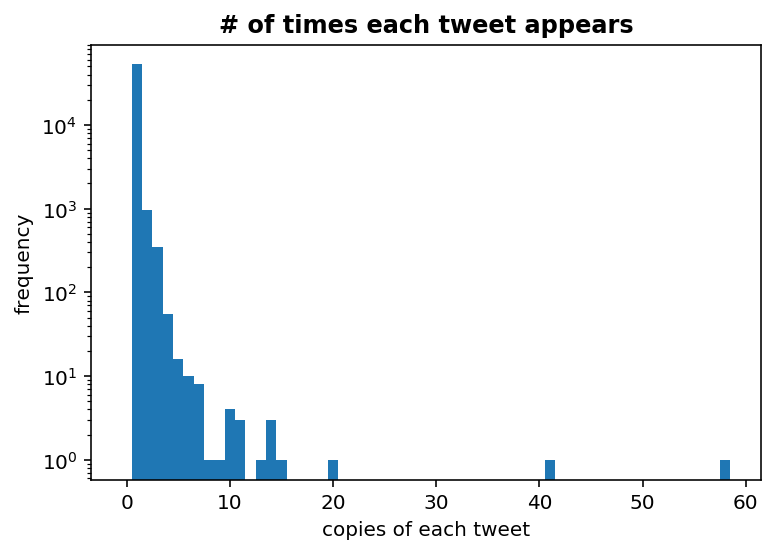

In [5]:
# number of times each tweet appears
counts = final_tweets.groupby(['text']).size().reset_index(name='counts').counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.title('# of times each tweet appears', weight = 'bold')
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [6]:
#extract the twitter handles of people mentioned in the tweet
def find_mentions(tweet):
    return re.findall(r'(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet) 

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

In [7]:
# make new columns for mentioned people and hashtags
final_tweets['mentions'] = final_tweets.text.apply(find_mentions)
final_tweets['hashtags_add'] = final_tweets.text.apply(find_hashtags)

**Top hashtags within tweets**
- #CoronavirusPandemic
- #CoronavirusUSA
- #Coronavirusupdate
- #CoronaLockdown
- #pandemic
- #CoronaUpdate
- #Coronavirustruth<br>
were among the top

In [8]:
final_tweets.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users', 'is_retweet', 'clean_tweets', 'clean_tweets_bi',
       'clean_hashtags', 'mentions', 'hashtags_add'],
      dtype='object')

In [9]:
# take the rows from the hashtag column where there are actually hashtags
hashtags_list_df = final_tweets.loc[
                       final_tweets.hashtags_add.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags_add']]
hashtags_list_df

# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags_add
    for hashtag in hashtags_list],
    columns=['hashtag'])

flattened_hashtags_df

# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_hashtags

hashtag  counts
0        #CoronavirusOutbreak   10415
1                    #COVID19    6942
2                #coronavirus    4198
3                   #Covid_19    2584
4                      #COVID    2443
...                       ...     ...
21439       #PrePartyESatHome       1
21440  #PreacherArrestedhttps       1
21441         #PreaidentBiden       1
21442            #Precautions       1
21443            #zzzzzzzzzzz       1

[21444 rows x 2 columns]

In [10]:
# removing hashtags that were used in scraping and other variantions of covid19
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#coronavirusoutbreak' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#covid19' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#COVID' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#covid' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#coronavirus' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#corona' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#coronavirusimpact' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#covid2019' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#covid_19' ].index , inplace=True)
popular_hashtags.drop( popular_hashtags[ popular_hashtags['hashtag'].str.lower() == '#covid-19' ].index , inplace=True)


In [11]:
# top 15 hastags
popular_hashtags.head(15)

hashtag  counts
6     #CoronavirusPandemic    1470
13         #CoronavirusUSA     736
14      #CoronaVirusUpdate     611
15         #CoronaLockdown     583
16               #pandemic     544
19           #CoronaUpdate     441
22       #Coronavirustruth     408
23        #COVID19Pandemic     396
24               #StayHome     382
25                  #China     361
26                  #Trump     354
27                  #Wuhan     320
28     #CoronaVirusUpdates     314
30  #StayAtHomeAndStaySafe     288
33    #CoronavirusLockdown     280

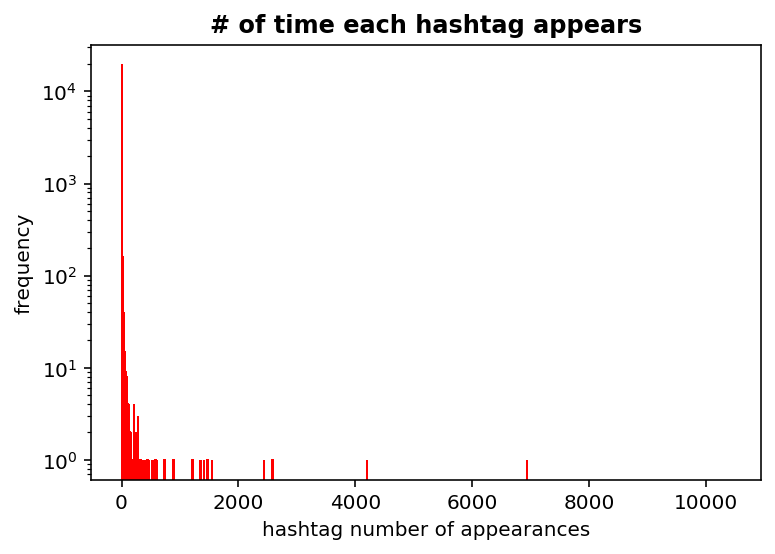

In [12]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins, color = 'red',  ec="red")
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.title('# of time each hashtag appears', weight = 'bold')
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

**Top accounts mentions**
 - Donald Trump appears twice in the top 5 mentions:
     - @realDonaldTrump	
     - @POTUS
 - Followed by @YouTube	, @WHO and @UKChange	

In [13]:
# take the rows from the hashtag columns where there are actually hashtags
mentions_list_df = final_tweets.loc[
                       final_tweets.mentions.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['mentions']]
mentions_list_df

# flattening the above list with multiple hashtags
# create dataframe where each use of hashtag gets its own row
flattened_mentions_df = pd.DataFrame(
    [mention for mentions_list in mentions_list_df.mentions
    for mention in mentions_list],
    columns=['mentions'])

flattened_mentions_df

flattened_mentions_df
flattened_mentions_df['mentions'].unique().size
popular_mentions = flattened_mentions_df.groupby('mentions').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_mentions.head(15) 

mentions  counts
0   @realDonaldTrump     933
1           @YouTube     722
2             @POTUS     251
3               @WHO     234
4          @UKChange     185
5               @CNN     153
6            @CDCgov     144
7            @Change     134
8                @VP     102
9     @SpeakerPelosi      97
10       @NYGovCuomo      97
11          @FoxNews      93
12     @narendramodi      89
13            @MSNBC      88
14        @GovAbbott      88

In [14]:
# writing popular hashtags and mentions to a file for visualization in tableau
popular_mentions.to_csv('../datasets/tweets/popular_mentions.csv',index = False)
popular_hashtags.to_csv('../datasets/tweets/popular_hastags.csv',index = False)

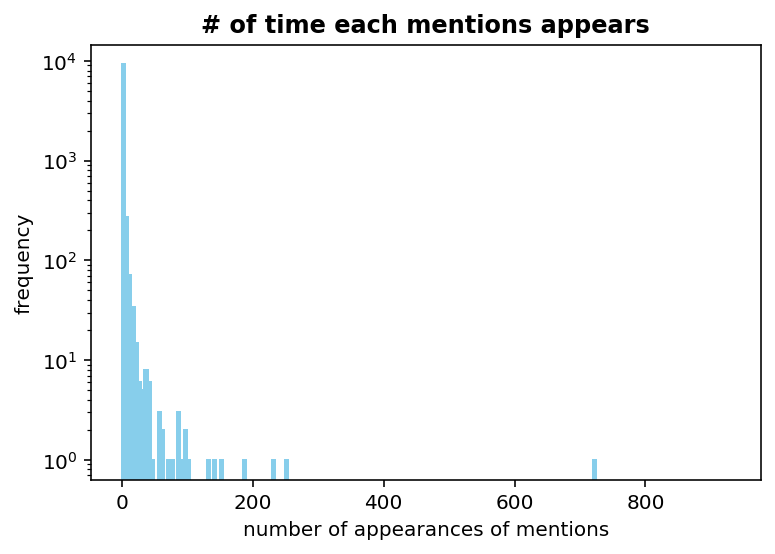

In [15]:
# number of times each mention appears
counts = flattened_mentions_df.groupby(['mentions']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins, color = 'skyblue',  ec="skyblue")
plt.title('# of time each mentions appears', weight = 'bold')
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('number of appearances of mentions')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [16]:
# function to plot word cloud
def plot_wordcloud(item, title):
    wordcloud = WordCloud( collocations=False,background_color="white", max_words=150).generate(item)

    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.title(title, fontsize = 16, weight = 'bold', color = 'blue')
    plt.tight_layout() #pad = 0

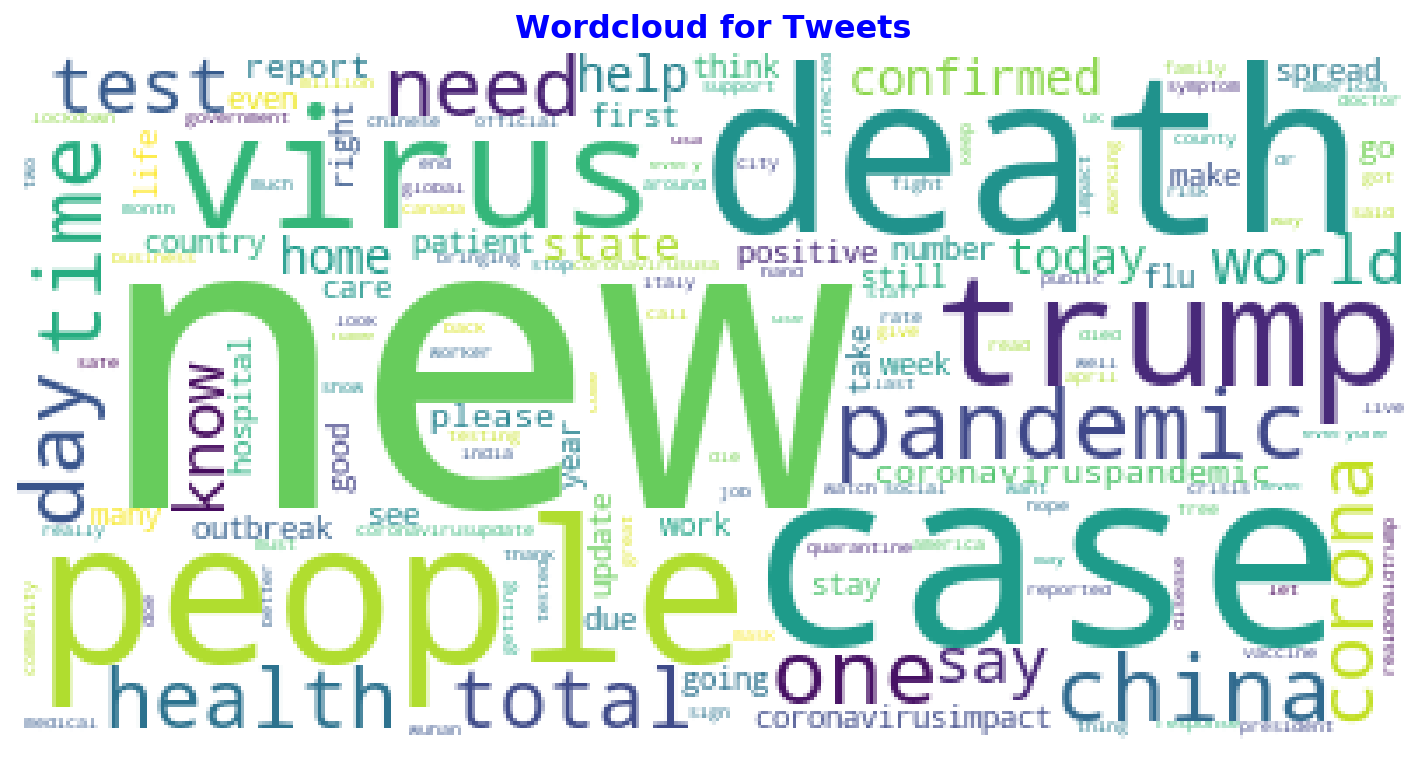

In [17]:
tweets = " ".join(t for t in final_tweets.clean_tweets)
plot_wordcloud(tweets, "Wordcloud for Tweets")

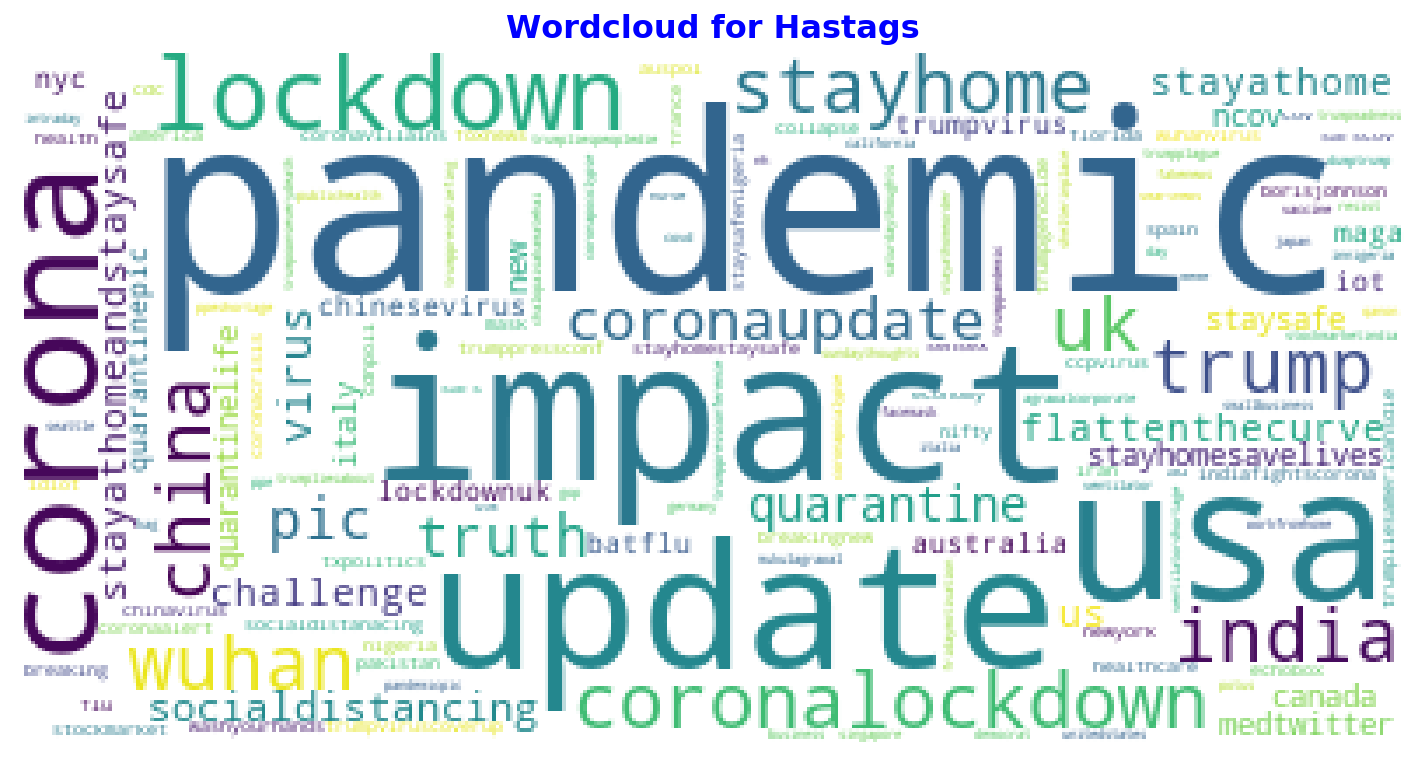

In [18]:
hashtags = " ".join(t for t in final_tweets.clean_hashtags)
type(hashtags)
# filtering out words that are part of hashtags used for extraction of tweets to gain insights into themes of hashtags
hashtags = hashtags.replace('covid', '')
hashtags = hashtags.replace('coronavirus', '')
hashtags = hashtags.replace('coronavirusoutbreak', '')
hashtags = hashtags.replace('coronaoutbreak', '')
hashtags = hashtags.replace('outbreak', '')
hashtags = hashtags.replace('https', '')
hashtags = hashtags.replace('coronavirusimpact', '')
# plot the word cloud after hashtag eliminations
plot_wordcloud(hashtags, "Wordcloud for Hastags")

In [19]:
final_tweets.columns

Index(['screen_name', 'username', 'user_id', 'tweet_id', 'tweet_url',
       'timestamp', 'timestamp_epochs', 'text', 'text_html', 'links',
       'hashtags', 'has_media', 'img_urls', 'video_url', 'likes', 'retweets',
       'replies', 'is_replied', 'is_reply_to', 'parent_tweet_id',
       'reply_to_users', 'is_retweet', 'clean_tweets', 'clean_tweets_bi',
       'clean_hashtags', 'mentions', 'hashtags_add'],
      dtype='object')

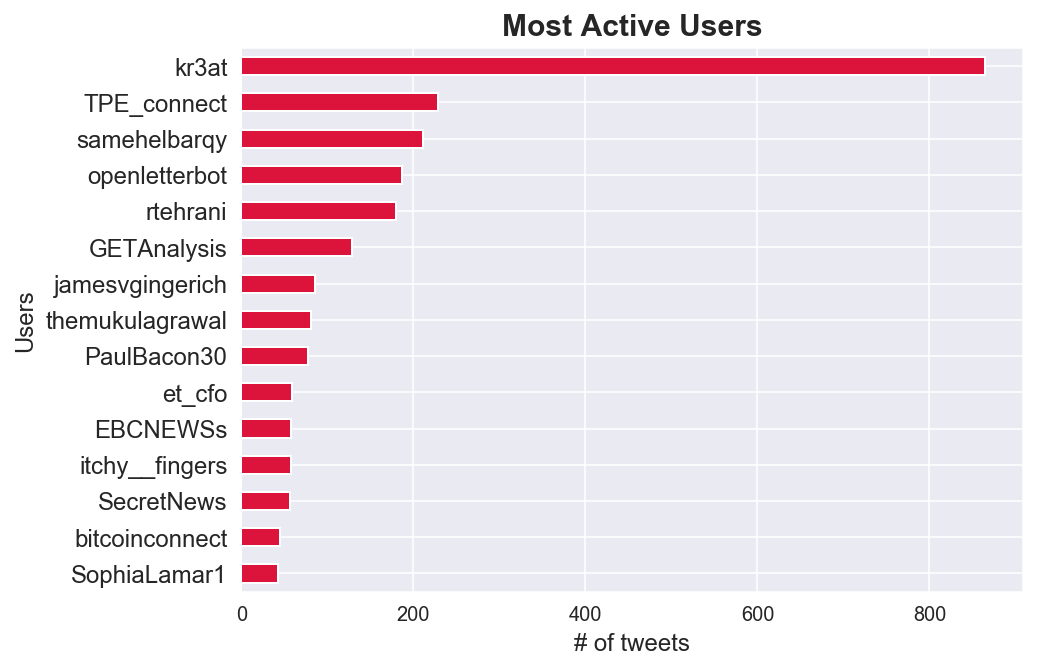

In [20]:
# most active users - most number of tweets, most likes, retweets and replies
plt.figure(figsize = (7,5))
sns.set_style("darkgrid")
final_tweets.groupby(['screen_name'])['tweet_id'].count().sort_values(ascending = False).head(15).plot(kind = 'barh', color = 'crimson')
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 12)
plt.title('Most Active Users', fontsize = 15, weight = 'bold')
plt.xlabel('# of tweets', fontsize = 12)
plt.ylabel('Users', fontsize = 12);
plt.gca().invert_yaxis();

**Steady increase in tweets over time in 2020**

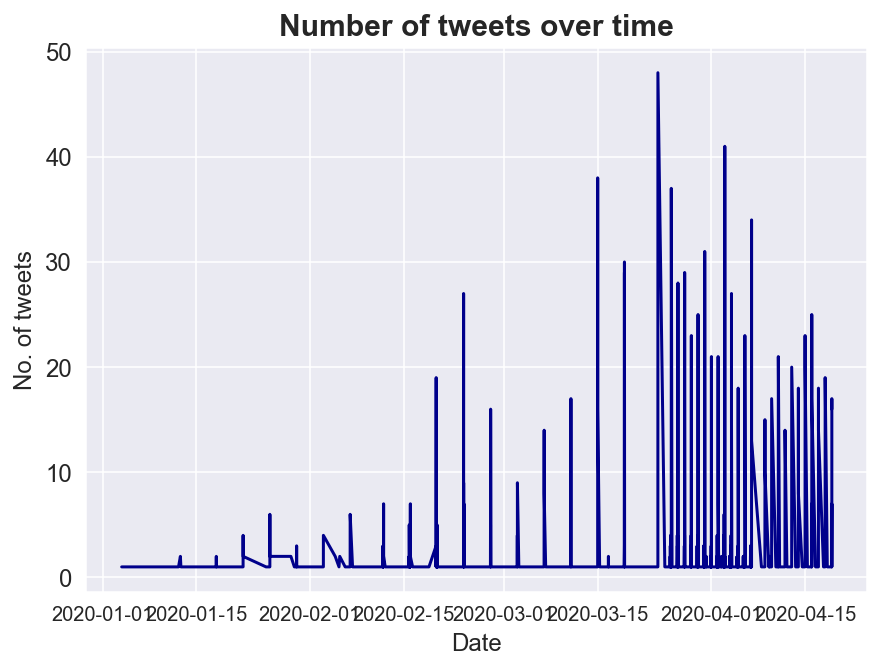

In [21]:
# check for tweeting trends 
final_tweets["timestamp"]= pd.to_datetime(final_tweets["timestamp"]) 
plotdf = final_tweets.groupby('timestamp')['tweet_id'].count().to_frame(name = 'count').reset_index()
plt.figure(figsize = (7,5))
plt.plot(plotdf['timestamp'], plotdf['count'], color = 'darkblue')
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 12)
plt.title('Number of tweets over time', fontsize = 15, weight = 'bold')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('No. of tweets', fontsize = 12);

**Saturday and Wednesday seems to be busy days to tweet whereas Tuesday records the lowest number of tweets.**

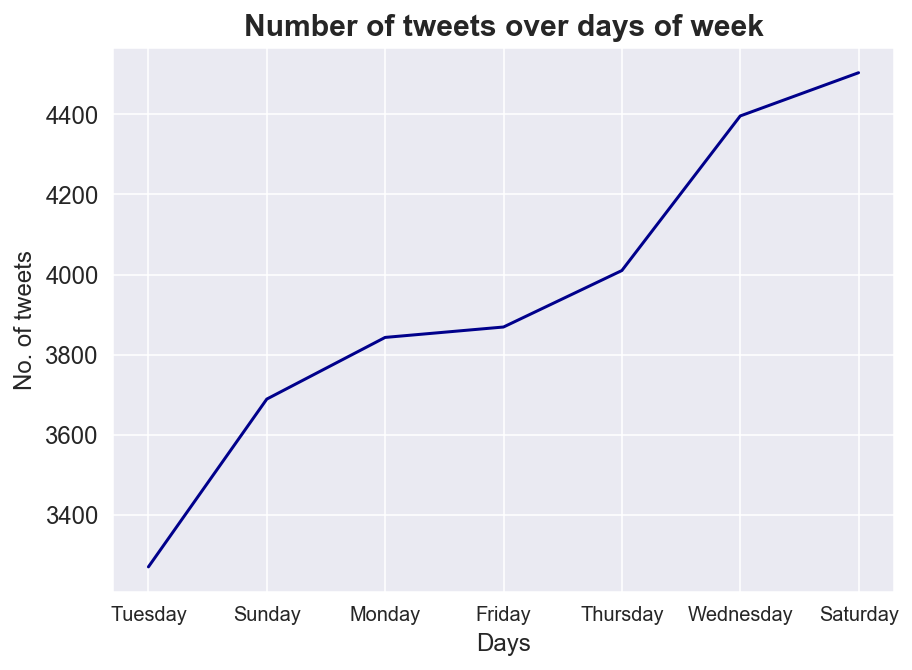

In [22]:
# check for tweeting trends - to be sorted by day
plotdf1 = final_tweets.groupby(plotdf.timestamp.dt.day_name())['tweet_id'].count().to_frame(name = 'count').sort_values(by = 'count').reset_index()
plt.figure(figsize = (7,5))
plt.plot(plotdf1['timestamp'], plotdf1['count'], color = 'darkblue')
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 12)
plt.title('Number of tweets over days of week', fontsize = 15, weight = 'bold')
plt.xlabel('Days', fontsize = 12)
plt.ylabel('No. of tweets', fontsize = 12);

### Modeling & Evaluation

1) Turning text into matrix, where each row in the matrix encodes which words appeared in each individual tweet.<br>
2) Filter the words max_df=0.9 - discard any words that appear in >90% of tweets. Disregarding high appearing words since they are too common to be meaningful in topics.<br> 
3) Also filter words using min_df=25 - so words that appear in less than 25 tweets will be discarded. Discarding low appearing words because we won’t have a strong enough signal and they will just introduce noise to our model.<br>

Since our tweet database is small we should be able to use a normal matrix, instead of a sparse matrix.

**Inspect the topics that is generated by the model and try to extract meaningful information from them.**

In [23]:
# function to extract the topics returned from the model in a dataframe. Each topic is a list of words/tokens and their weights.
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [24]:
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern="\w+|\$[\d\.]+|\S+")

# apply transformation
tf = vectorizer.fit_transform(final_tweets['clean_tweets']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

tf_feature_names

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-24-4f9a6303d0ea>:2: DeprecationWarning: invalid escape sequence \w
  vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern="\w+|\$[\d\.]+|\S+")


['ab',
 'abba',
 'abc',
 'ability',
 'able',
 'aboard',
 'abortion',
 'abroad',
 'absolute',
 'absolutely',
 'abt',
 'abuse',
 'ac',
 'academic',
 'accept',
 'acceptable',
 'accepting',
 'access',
 'accident',
 'according',
 'account',
 'accountable',
 'accurate',
 'accused',
 'ace',
 'acosta',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'active',
 'actively',
 'activity',
 'actor',
 'actual',
 'actually',
 'acute',
 'ad',
 'adam',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',
 'addressing',
 'admin',
 'administration',
 'admit',
 'admits',
 'admitted',
 'adult',
 'advance',
 'advantage',
 'advertising',
 'advice',
 'advised',
 'advisory',
 'advocate',
 'af',
 'affair',
 'affect',
 'affected',
 'affecting',
 'afford',
 'afraid',
 'africa',
 'african',
 'afternoon',
 'age',
 'aged',
 'agency',
 'agenda',
 'agent',
 'aggressive',
 'ago',
 'agrawalcorporate',
 'agree',
 'agreed',
 'ah',
 'ahead',
 'ai',
 'aid',
 'aim',
 'air',
 'airborne',
 'aircraft',
 'air

In [25]:
tf.shape

(56413, 3678)

**Arbitrarily choosing 10 topics**

In [26]:
# takes 5-8 mins to run
number_of_topics = 10
# instantiate the model
model = LatentDirichletAllocation(n_components=number_of_topics, random_state=42)
# fit the model
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [27]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0          home          1650.8           day          1024.4        people   
1          stay          1464.2          time           827.5         would   
2        social           769.1           one           800.5           get   
3          year           676.3           get           767.6         think   
4          week           653.1        family           711.4          know   
5        people           608.6           due           647.1          like   
6          safe           601.2         thank           599.4           one   
7          hand           572.5        please           598.0      hospital   
8          take           552.0          back           591.3        really   
9          time           525.6        school           578.1           die   

  Topic 2 weights      Topic 3 words Topic 3 weights Topic 4 words  \
0          2028.0  coronavirusimpact          1552.0          mask   
1          1204.2           pandemic          1213.4          test   
2           982.5           business           702.9          need   
3           963.4             impact           685.7          sign   
4           870.8               news           642.2          help   
5           761.3             crisis           588.9        people   
6           734.0             update           545.2         staff   
7           673.0             market           533.3          face   
8           646.9               read           458.2          know   
9           591.9             global           454.5      positive   

  Topic 4 weights Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights  \
0          1051.7        health          1390.9         virus          1569.2   
1           957.1       disease          1055.4        corona          1554.6   
2           934.5         virus          1019.1          like          1145.5   
3           668.3       patient           932.1        people          1079.7   
4           647.5        number           772.4      lockdown          1067.7   
5           548.5         china           769.7         india           748.5   
6           536.8          rate           747.8          make           655.5   
7           522.9          case           717.7          time           578.0   
8           507.8          name           690.2       testing           578.0   
9           478.4     infection           582.7       country           566.1   

  Topic 7 words Topic 7 weights        Topic 8 words Topic 8 weights  \
0          case          6235.4                china          1332.8   
1           new          5370.6             outbreak           797.3   
2         death          5213.8  coronaviruspandemic           675.3   
3         total          2305.1                 amid           553.1   
4     confirmed          1855.2              support           518.3   
5        report          1633.0             pandemic           507.0   
6      reported          1104.9               canada           436.3   
7         today          1074.7               supply           411.7   
8      bringing           875.1                  act           407.3   
9           usa           593.5              medical           395.7   

     Topic 9 words Topic 9 weights  
0            trump          3368.7  
1  realdonaldtrump           947.6  
2         american           871.4  
3        president           761.5  
4                b           731.6  
5         pandemic           673.2  
6                c           668.1  
7              say           531.3  
8         response           507.0  
9            state           476.6

In [46]:
no_top_words = 20
words_weights_df = display_topics(model, tf_feature_names, no_top_words)
words_weights_df.to_csv('../datasets/tweets/topicsnweights.csv')

In [47]:
# Log Likelihood: Higher the better
print("Log Likelihood: ", model.score(tf))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model.perplexity(tf))

# See model parameters
print(model.get_params())

Log Likelihood:  -4336734.64812968
Perplexity:  1621.1805811492675
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 10, 'n_jobs': None, 'perp_tol': 0.1, 'random_state': 42, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


**pyLDAvis library is used to visualize the topics generated in a 2D space.**<br>
**This visualization is interactive and displays topics along with the most relevant words.**

In [28]:
pyLDAvis.enable_notebook()
dtm = np.matrix(tf) # converting the nparray to matrix
panel = pyLDAvis.sklearn.prepare(model, dtm, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2      32.420952   8.115230       1        1  13.741745
1       0.648955  71.707100       2        1  12.532334
5      71.019684   9.971006       3        1  11.184173
3       3.785981  33.185135       4        1  10.664208
9     -42.666500  -9.222070       5        1  10.487277
6      -3.621689 -43.526516       6        1   9.814730
0      -3.632402  -4.171708       7        1   9.166488
7     -36.584400  35.804413       8        1   7.576630
8      44.391380  50.615383       9        1   7.420046
4      40.235809 -31.591665      10        1   7.412370, topic_info=        Term         Freq        Total Category  logprob  loglift
470     case  7169.000000  7169.000000  Default  30.0000  30.0000
2159     new  5839.000000  5839.000000  Default  29.0000  29.0000
856    death  5760.000000  5760.000000  Default  28.0000  28.0000
3366   trump  3345.000000  3345.000000  Default  27.0000  27.0000
3313   total  2390.000000  2390.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
479    cause   205.023276   563.735556  Topic10  -5.3572   1.5906
3620    work   239.678998  1470.562725  Topic10  -5.2011   0.7879
3453     use   200.347652   714.182704  Topic10  -5.3803   1.3309
3038  spread   216.841099  1496.328628  Topic10  -5.3012   0.6704
3056   state   196.794555  1743.225102  Topic10  -5.3982   0.4207

[688 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         2  0.973752       abba
5         9  0.991710     aboard
19        3  0.737214  according
19        4  0.137324  according
19        5  0.104800  according
...     ...       ...        ...
3661     10  0.010178        yes
3665      8  0.998046       york
3666      8  0.965714    yorkers
3672      8  0.981909    zealand
3676     10  0.982709        zoo

[1983 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 6, 4, 10, 7, 1, 8, 9, 5])

In [29]:
# saving the above to a webpage for presentation purposes
pyLDAvis.save_html(panel,'lda.html')

**Checking with bigrams that were generated above**

In [49]:
# the vectorizer object will be used to transform text to vector form
vectorizer2 = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf2 = vectorizer2.fit_transform(final_tweets['clean_tweets_bi']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names2 = vectorizer2.get_feature_names()

tf_feature_names2

<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<>:2: DeprecationWarning: invalid escape sequence \w
<ipython-input-49-8a7cfd45b7af>:2: DeprecationWarning: invalid escape sequence \w
  vectorizer2 = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')


['ab',
 'abba',
 'abba_kyari',
 'abc',
 'abc_news',
 'ability',
 'able',
 'aboard',
 'aboard_air',
 'abortion',
 'abroad',
 'absolute',
 'absolutely',
 'abt',
 'abuse',
 'ac',
 'academic',
 'accept',
 'acceptable',
 'accepting',
 'access',
 'accident',
 'according',
 'account',
 'accountable',
 'accurate',
 'accused',
 'ace',
 'acosta',
 'across',
 'across_country',
 'across_globe',
 'across_world',
 'act',
 'act_deliver',
 'acted',
 'acting',
 'action',
 'active',
 'active_case',
 'actively',
 'activity',
 'actor',
 'actual',
 'actually',
 'acute',
 'ad',
 'adam',
 'add',
 'add_name',
 'added',
 'adding',
 'addition',
 'additional',
 'address',
 'addressing',
 'admin',
 'administration',
 'admit',
 'admits',
 'admitted',
 'adult',
 'advance',
 'advantage',
 'advertising',
 'advice',
 'advised',
 'advisory',
 'advocate',
 'af',
 'affair',
 'affect',
 'affected',
 'affecting',
 'afford',
 'afraid',
 'africa',
 'african',
 'african_american',
 'afternoon',
 'age',
 'aged',
 'agency',
 'a

In [50]:
# instantiating and fitting the model with the new matrix with bigrams
# takes 5-8 mins to run
number_of_topics = 10

model2 = LatentDirichletAllocation(n_components=number_of_topics, random_state=42)
model2.fit(tf2)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [51]:
# display generated topics
no_top_words2 = 10
display_topics(model2, tf_feature_names2, no_top_words2)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights  \
0               stay          1228.3         virus          1466.2   
1               home          1047.0        corona          1293.5   
2  coronavirusimpact          1013.5          mask           987.5   
3               time           979.5         world           841.6   
4             social           772.3          news           826.0   
5           pandemic           765.0        health           665.3   
6               safe           722.6  corona_virus           641.8   
7             impact           544.3          week           514.4   
8               take           526.7            uk           482.7   
9         distancing           517.1          year           482.5   

  Topic 2 words Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words  \
0         death          1678.3        people          3785.0          news   
1           day          1192.1          know          1182.1        update   
2        number          1038.6          need           972.6        public   
3           flu           993.5          many           795.4          live   
4         virus           755.5           due           697.0         virus   
5          rate           658.6      business           642.0      pandemic   
6         china           647.0           get           569.2         watch   
7       vaccine           630.7    government           552.6        health   
8     infection           548.6         right           544.3       disease   
9       disease           508.9         think           535.0          name   

  Topic 4 weights Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights  \
0           938.8         china          1303.3           get          1427.0   
1           696.7        doctor           788.9          like           990.1   
2           633.8       medical           752.5            go           851.9   
3           565.6       patient           643.5         going           848.9   
4           555.3      outbreak           538.6          help           812.3   
5           535.1       support           522.4          make           686.5   
6           518.2          life           476.2          back           681.1   
7           505.4      hospital           464.4             b           629.1   
8           495.8      pandemic           464.1         would           618.3   
9           460.4          amid           461.1           god           558.8   

         Topic 7 words Topic 7 weights   Topic 8 words Topic 8 weights  \
0                 test          1794.8            case          6134.3   
1             positive          1506.7             new          4978.4   
2               tested          1010.7           death          3891.4   
3              testing           766.7           total          2305.1   
4                 home           751.9        new_case          1870.1   
5               people           565.8       confirmed          1870.1   
6                state           555.4          report          1502.4   
7  coronaviruspandemic           476.3  confirmed_case          1277.1   
8      tested_positive           468.1       new_death          1133.1   
9        test_positive           426.7        case_new          1113.1   

     Topic 9 words Topic 9 weights  
0            trump          3376.0  
1  realdonaldtrump           974.8  
2         american           753.8  
3        president           708.6  
4             sign           595.3  
5              say           529.6  
6         response           466.4  
7             like           452.0  
8            potus           435.1  
9         petition           423.1

**No noteworthy keywords observed from bigrams, so sticking to the above model with single words.**

In [52]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", model2.score(tf2))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", model2.perplexity(tf2))


Log Likelihood:  -4825104.728546658
Perplexity:  1750.8785089418875


### Trying NMF (Non - Negative Matrix Factorization)

It is deemed to be fit for short documents such as tweets as opposed to LDA. 

In [53]:
# defining stop words before feeding to TDIDF vectorizer
stops = set(stopwords.words('english'))
stops.update(['u','wa','ha','ak','le','via','com','bit','ly','pic','divr','viru','html','http','https','wwww','youtube','youtu','retweet','covid','coronaviru','coronavirus','twitter','coronavirusoutbreak','coronavirusoutbrea'])

# NMF is able to use tf-idf unlike LDA
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=25, stop_words=stops)
tfidf = tfidf_vectorizer.fit_transform(final_tweets['clean_tweets'])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [54]:
no_topics = 10
nmf_model = NMF(n_components=no_topics, random_state=42, alpha=.1, l1_ratio=.5)
nmf_model.fit(tfidf)

NMF(alpha=0.1, beta_loss='frobenius', init=None, l1_ratio=0.5, max_iter=200,
    n_components=10, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [55]:
no_top_words = 10
display_topics(nmf_model, tfidf_feature_names, no_top_words)

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0           new             8.9        people             3.7        corona   
1         total             2.3           get             2.2         virus   
2      bringing             1.6          like             1.8         china   
3        report             1.5           one             1.7          name   
4         today             1.5          time             1.7       disease   
5      reported             1.2          need             1.6         wuhan   
6          york             0.6          know             1.5          sars   
7          name             0.6          home             1.4    medtwitter   
8       disease             0.2           day             1.4        batflu   
9        caused             0.2          help             1.3       chinese   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0             6.0          test             4.8          case             9.0   
1             6.0      positive             2.3     confirmed             3.2   
2             1.1          sign             2.1         total             2.2   
3             0.9      petition             2.1        report             1.0   
4             0.9            nh             2.0      bringing             0.8   
5             0.9         staff             2.0      reported             0.8   
6             0.5      ukchange             2.0     recovered             0.6   
7             0.4     frontline             1.9        county             0.6   
8             0.4      priority             1.9         china             0.6   
9             0.4        tested             0.7         first             0.5   

  Topic 5 words Topic 5 weights    Topic 6 words Topic 6 weights  \
0        update             6.7            trump             7.4   
1        latest             1.8        president             0.9   
2          live             0.8         american             0.7   
3          news             0.5         response             0.7   
4         march             0.4           donald             0.6   
5      outbreak             0.3  realdonaldtrump             0.5   
6         april             0.3   administration             0.4   
7        county             0.3          america             0.4   
8         daily             0.3              say             0.3   
9         watch             0.3             said             0.3   

          Topic 7 words Topic 7 weights Topic 8 words Topic 8 weights  \
0              pandemic             7.4         death             8.9   
1   coronaviruspandemic             2.5         total             2.0   
2     coronavirusupdate             1.2          toll             0.7   
3        coronavirususa             0.9      reported             0.6   
4  coronaviruschallenge             0.6        report             0.6   
5                 wuhan             0.6      bringing             0.5   
6            medtwitter             0.6           usa             0.5   
7                batflu             0.6          rate             0.5   
8                global             0.6     confirmed             0.5   
9              stayhome             0.5          date             0.3   

  Topic 9 words Topic 9 weights  
0      official             2.4  
1       support             2.2  
2          last             1.9  
3       signing             1.9  
4          copy             1.9  
5     delivered             1.9  
6       deliver             1.9  
7          must             1.7  
8           act             1.6  
9       senator             1.6

**Topics generated with NMF model appears to be very similar to the one generated with LDA. Thus sticking to LDA model as final model**